In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.ensemble import AdaBoostRegressor


In [6]:
train_data = pd.read_csv('../main_dataset.csv')

In [7]:
train_data['Id'] = np.where(train_data['Id'] < 1e-18, 1e-18, train_data['Id'])
train_data['Log_Id'] = np.log10(train_data['Id'])

In [8]:
X = train_data[['Tox','Nc','Nd', 'Ns', 'Vds', 'Vgs']] # ignoring Nc
y = train_data['Log_Id']


poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

model = AdaBoostRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
# the above code eas execulted on google collab with TPU processor, since it is taking more than 1 hour to train the model in laptop

# importing the trained model
import joblib 
# model = joblib.load("adaboost_regressor.joblib")
model.score(X_train, y_train)

0.9394929666520877

In [ ]:
y_pred_1 = model.predict(X_test)
print(r2_score(y_pred_1, y_test))


0.9137746400336777


In [ ]:
# note :
# 1. Ignored - column - Tsi
# the train inputs are preprocesses with polynomail features (degree = 3, include_bias = False)
# train inputs are further processed StanderScaler
# while testing the test data - first preprocess the data by removing the values less than 1e-18
# preprocess - data with poly(which was fitted on to the train) and scaler (which wass fitted on train)

# model predicts the log(Id) value

In [ ]:
# testing the model on the test data set 
#  importing the testt data
test_data = pd.read_csv('../test_data.csv')


In [ ]:
print(test_data[test_data['Vgs'] == 2].index.tolist())

[202, 405, 608, 811, 1014]


In [ ]:
test_data = test_data.iloc[812:1015]
print(test_data)

      Tsi  Tox            Ns            Nc            Nd  Vds       Vgs  \
812    10  3.0  5.000000e+19  1.000000e+16  5.000000e+19  1.0  0.000000   
813    10  3.0  5.000000e+19  1.000000e+16  5.000000e+19  1.0  0.002000   
814    10  3.0  5.000000e+19  1.000000e+16  5.000000e+19  1.0  0.005733   
815    10  3.0  5.000000e+19  1.000000e+16  5.000000e+19  1.0  0.012951   
816    10  3.0  5.000000e+19  1.000000e+16  5.000000e+19  1.0  0.022951   
...   ...  ...           ...           ...           ...  ...       ...   
1010   10  3.0  5.000000e+19  1.000000e+16  5.000000e+19  1.0  1.962951   
1011   10  3.0  5.000000e+19  1.000000e+16  5.000000e+19  1.0  1.972951   
1012   10  3.0  5.000000e+19  1.000000e+16  5.000000e+19  1.0  1.982951   
1013   10  3.0  5.000000e+19  1.000000e+16  5.000000e+19  1.0  1.992951   
1014   10  3.0  5.000000e+19  1.000000e+16  5.000000e+19  1.0  2.000000   

                Id  
812   1.060000e-11  
813   9.270000e-12  
814   7.270000e-12  
815   4.490000e

In [ ]:
test_data['Id'] = np.where(test_data['Id'] < 1e-18, 1e-18, test_data['Id'])
test_data['Log_Id'] = np.log10(test_data['Id'])

In [ ]:
X_test_1 = test_data[['Tox','Nc', 'Nd', 'Ns', 'Vds', 'Vgs']]
y_test_1 = test_data['Log_Id']

NameError: name 'test_data' is not defined

In [ ]:
X_test_1_transformed = poly.transform(X_test_1)
X_test_1_scaled = scaler.transform(X_test_1_transformed)

y_pred_test_1 = model.predict(X_test_1_scaled)
print(r2_score(y_pred_test_1, y_test_1))

0.9618356957534413


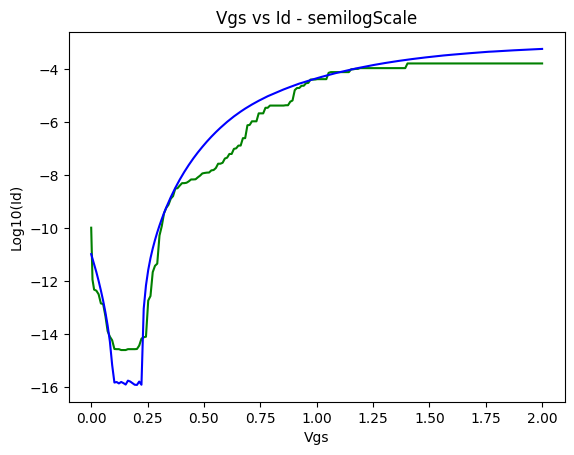

In [ ]:
# plotting the data 
plt.plot(X_test_1['Vgs'], y_pred_test_1, color = "green")
plt.plot(X_test_1['Vgs'], y_test_1, color = "blue")
plt.title('Vgs vs Id - semilogScale')
plt.xlabel('Vgs')
plt.ylabel('Log10(Id)')
plt.show()

In [ ]:
# plotting the data 
plt.plot(X_test_1['Vgs'], np.maximum(np.power(10, y_pred_test_1), 1e-18), color = "green")
plt.semilogy(X_test_1['Vgs'], np.maximum(np.power(10, y_test_1), 1e-18), color = "blue")
plt.title('Vgs vs Id - linearScale')
plt.xlabel('Vgs')
plt.ylabel('Id')
plt.show()

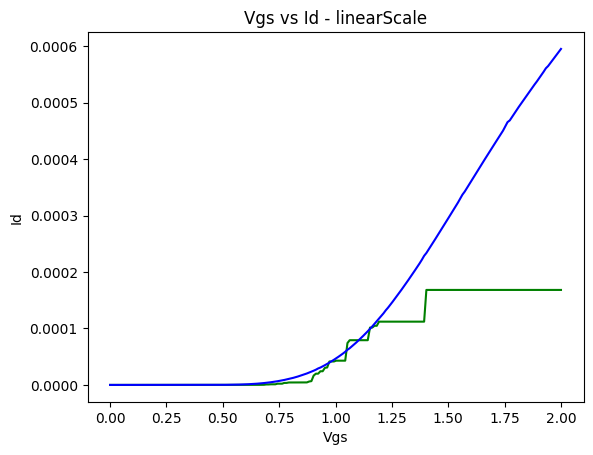

In [ ]:
# plotting the data 
plt.plot(X_test_1['Vgs'], np.maximum(np.power(10, y_pred_test_1), 1e-18), color = "green")
plt.plot(X_test_1['Vgs'], np.maximum(np.power(10, y_test_1), 1e-18), color = "blue")
plt.title('Vgs vs Id - linearScale')
plt.xlabel('Vgs')
plt.ylabel('Id')
plt.show()

In [ ]:
print(model.get_params())

{'estimator': None, 'learning_rate': 1.0, 'loss': 'linear', 'n_estimators': 200, 'random_state': 42}
